Text(0, 0.5, 'Sepal width (cm)')

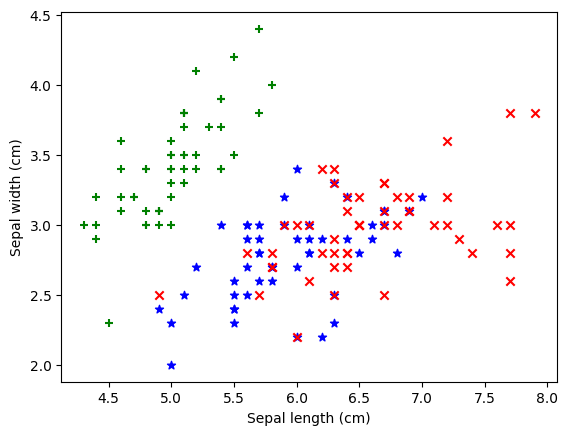

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset:
data = pd.read_csv("IRIS.csv")

# Converting the classes into the numbers 0, 1 and 2:
le_species = LabelEncoder()
classes = data.drop('species', axis='columns')
target = le_species.fit_transform(data['species'])
data['target'] = target

df0 = data[data['target']==0]
df1 = data[data['target']==1]
df2 = data[data['target']==2]

# Visualize the data of the sepals:
plt.scatter(df0['sepal_length'], df0['sepal_width'], color='green', marker='+')
plt.scatter(df1['sepal_length'], df1['sepal_width'], color='blue', marker='*')
plt.scatter(df2['sepal_length'], df2['sepal_width'], color='red', marker='x')
plt.xlabel("Sepal length (cm)") 
plt.ylabel("Sepal width (cm)") 

IRIS dataset is multiclass due to the fact that it contains three classes.

Text(0, 0.5, 'Petal width (cm)')

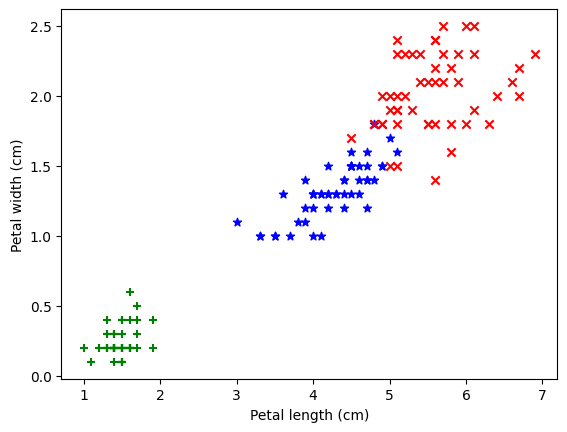

In [17]:
# Visualize the data of the petals:
plt.scatter(df0['petal_length'], df0['petal_width'], color='green', marker='+')
plt.scatter(df1['petal_length'], df1['petal_width'], color='blue', marker='*')
plt.scatter(df2['petal_length'], df2['petal_width'], color='red', marker='x')
plt.xlabel("Petal length (cm)") 
plt.ylabel("Petal width (cm)") 

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

columns_to_drop = ['species', 'target']
X = data.drop(columns_to_drop, axis=1)
y = data['target']

# Split the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for GridSearchCV:
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create an instance of GridSearchCV:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance to the training data:
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters:
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model on the test set:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.9777777777777777


The key tuning parameters for the SVM model were automatically set by GridSearchCV to obtain the best performance. Specifically:
The regularization parameter C was set to 1 to balance minimizing classification errors and maximizing the margin to avoid overfitting or underfitting. A polynomial kernel was chosen over RBF to better separate the non-linear Iris data by projecting it into higher dimensions.
The gamma parameter was set to 'scale' to automatically scale based on the data features and standard deviations, working well with the polynomial kernel. GridSearchCV optimized the SVM hyperparameters - C for regularization, choosing a polynomial kernel for the non-linear data, and scaling gamma - to achieve the highest predictive accuracy on this dataset.